In [32]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import pydotplus

In [34]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']

In [35]:
iris_feture_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feture = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

In [36]:
path = '../9.Regression/iris.data'
data = pd.read_csv(path, header=None)

In [37]:
x = data[range(4)]
y = LabelEncoder().fit_transform(data[4])

In [38]:
# 为了可视化，仅使用前两列特征
x = x.iloc[:,:2]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)

## 决策树参数估计/模型建立

In [40]:
# min_samples_split = 10：如果该结点包含的样本数目大于10，则(有可能)对其分支
# min_samples_leaf = 10：若将某结点分支后，得到的每个子结点样本数目都大于10，则完成分支；否则，不进行分支

In [41]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)
print 'accuracy_score:', accuracy_score(y_test, y_test_hat)

accuracy_score: 0.622222222222


## 保存模型图形

In [42]:
# 保存
# dot -Tpng my.dot -o my.png
# 输出
with open('iris.dot', 'w') as f:
    tree.export_graphviz(model, out_file=f)

In [43]:
# 给定文件名输出
tree.export_graphviz(model, out_file='iris1.dot')

In [44]:
# 输出为pdf
dot_data = tree.export_graphviz(model, out_file=None, feature_names=iris_feture_E, \
                              class_names=iris_class, filled=True, rounded=True, \
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')
f = open('iris.png', 'wb')
f.write(graph.create_png())
f.close()

## 绘图

In [45]:
N,M = 50,50
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1,t2) # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1) #测试点
print x_show.shape

(2500L, 2L)


In [46]:
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g','r','b'])
y_show_hat = model.predict(x_show)  # 预测
print y_show_hat.shape
print y_show_hat

(2500L,)
[0 0 0 ..., 2 2 2]


In [47]:
y_show_hat = y_show_hat.reshape(x1.shape)
print y_show_hat

[[0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]]


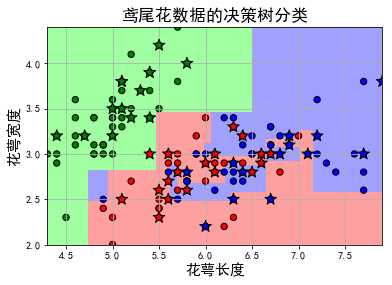

In [48]:
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值显示
plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, \
            zorder=10, cmap=cm_dark, marker='*') # 测试数据
plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark) # 全部数据
plt.xlabel(iris_feture[0], fontsize=15)
plt.ylabel(iris_feture[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=17)
plt.show()

## 判断模型好坏

In [49]:
y_test = y_test.reshape(-1)
print y_test_hat
print y_test

[0 1 2 0 2 2 1 0 0 2 2 0 1 2 1 0 2 1 0 0 1 0 2 0 2 1 0 0 1 1 2 2 2 2 1 0 1
 0 2 1 2 0 1 1 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [50]:
result = (y_test == y_test_hat)
acc = np.mean(result)
print u'准确度: %.2f%%' % (100 * acc)

准确度: 62.22%


## 决策树深度对模型结果的影响

In [52]:
depth = np.arange(1,15)
err_list = []

1  错误率：44.44%
2  错误率：40.00%
3  错误率：20.00%
4  错误率：24.44%
5  错误率：26.67%
6  错误率：26.67%
7  错误率：35.56%
8  错误率：42.22%
9  错误率：35.56%
10  错误率：40.00%
11  错误率：37.78%
12  错误率：35.56%
13  错误率：37.78%
14  错误率：35.56%


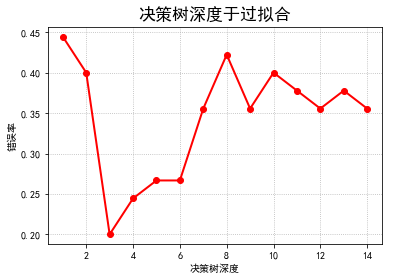

In [53]:
for d in depth:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(x_train, y_train)
    y_test_hat = clf.predict(x_test)
    err = 1 - accuracy_score(y_test, y_test_hat)
    err_list.append(err)
    print d,u' 错误率：%.2f%%' % (100 * err)
plt.plot(depth, err_list, 'ro-', lw=2)
plt.xlabel(u'决策树深度')
plt.ylabel(u'错误率')
plt.title(u'决策树深度于过拟合', fontsize=17)
plt.grid(b=True, ls=':')
plt.show()